<a href="https://colab.research.google.com/github/doyoung1122/24-2/blob/Mathematical_Statistics1/%EC%88%98%EB%A6%AC%ED%86%B5%EA%B3%84%ED%95%99_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**여러가지** 지표를 활용 출산율을 예측하는 회귀분석

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
file_urls = [
    "https://drive.google.com/file/d/1-KrUaTo4EQYQ3HYsPitpX8cwraVeP0QD/view?usp=sharing",
    "https://drive.google.com/file/d/1-HYm5ImhvOsFpGRDTOZErSdU4hKnWSQg/view?usp=sharing",
    "https://drive.google.com/file/d/1-MrubFB0vDgwhluYbfOzebyGmN6D84PU/view?usp=sharing",
    "https://drive.google.com/file/d/1-O1im7KE7PkGuE_ckg1MQK79ziG5Pr5K/view?usp=sharing",
    "https://drive.google.com/file/d/1-8rkUyXTDEWC48zBGc4f2ZBshCOZGIHY/view?usp=sharing",
    "https://drive.google.com/file/d/1-P8fjLxHFVlDCXYzhApBuXHBknidCUza/view?usp=sharing"
]

download_urls = [
    f"https://drive.google.com/uc?id={url.split('/d/')[1].split('/view')[0]}" for url in file_urls
]

data_frames = [pd.read_csv(url) for url in download_urls]
combined_data = pd.concat(data_frames, ignore_index=True)

In [ ]:
numeric_columns = ["합계출산율", "1인당 지역내총생산", "1인당 지역총소득", "1인당 개인소득", "1인당 민간소비", "경제활동인구 (천명)", "고용률 (%)", "실업률 (％)"]

for col in numeric_columns:
    if combined_data[col].dtype == 'object':
        combined_data[col] = combined_data[col].str.replace(",", "").astype(float)

In [ ]:
X = combined_data[[
    "1인당 지역내총생산", "1인당 지역총소득", "1인당 개인소득", "1인당 민간소비", "경제활동인구 (천명)", "고용률 (%)", "실업률 (％)"
]].values
y = combined_data["합계출산율"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(86, 7)

In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 신경망 구조 설정
d_input = X_train.shape[1]  # 입력 변수 개수 (7개)
d_hidden = 10
d_output = 1

# 가중치 및 편향 초기화
np.random.seed(42)
w1 = np.random.rand(d_input, d_hidden)
w2 = np.random.rand(d_hidden, d_output)
b1 = np.random.rand(1, d_hidden)
b2 = np.random.rand(1, d_output)

# 학습 파라미터 설정
lr = 0.01
num_epochs = 1000

# 학습
for epoch in range(num_epochs):
    z1 = np.dot(X_train, w1) + b1
    h = 1 / (1 + np.exp(-z1))
    y_pred = np.dot(h, w2) + b2

    # 손실 계산
    loss = np.mean(np.square(y_pred - y_train.reshape(-1, 1)))

    if (epoch % 100) == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}')

    # 역전파
    grad_y_pred = 2.0 * (y_pred - y_train.reshape(-1, 1)) / y_train.size
    grad_w2 = np.dot(h.T, grad_y_pred)
    grad_b2 = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_h = np.dot(grad_y_pred, w2.T) * (h * (1 - h))
    grad_w1 = np.dot(X_train.T, grad_h)
    grad_b1 = np.sum(grad_h, axis=0, keepdims=True)

    # 경량 하강법
    w1 -= lr * grad_w1
    b1 -= lr * grad_b1
    w2 -= lr * grad_w2
    b2 -= lr * grad_b2

Epoch 1/1000, Loss: 4.3861
Epoch 101/1000, Loss: 0.2123
Epoch 201/1000, Loss: 0.1213
Epoch 301/1000, Loss: 0.0792
Epoch 401/1000, Loss: 0.0583
Epoch 501/1000, Loss: 0.0469
Epoch 601/1000, Loss: 0.0399
Epoch 701/1000, Loss: 0.0351
Epoch 801/1000, Loss: 0.0317
Epoch 901/1000, Loss: 0.0291


In [ ]:
# 테스트 데이터 예측
z1_test = np.dot(X_test, w1) + b1
h_test = 1 / (1 + np.exp(-z1_test))
y_pred_test = np.dot(h_test, w2) + b2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

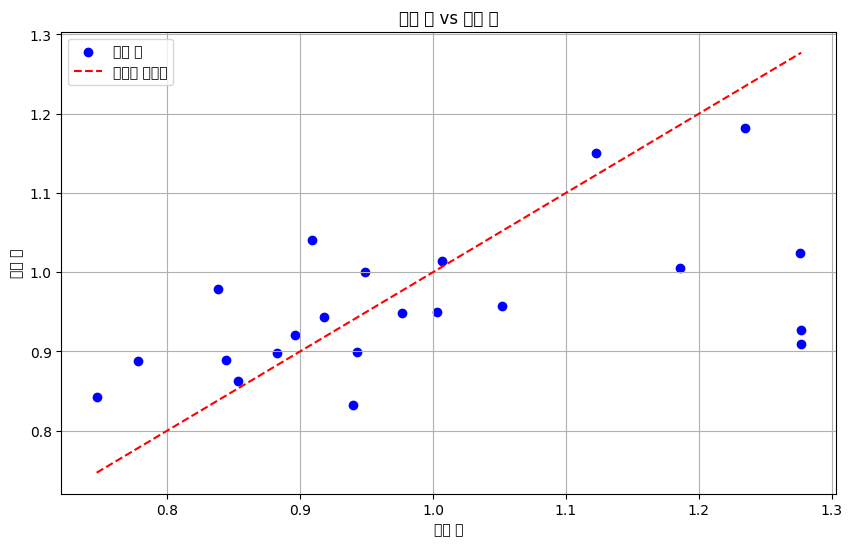

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='예측 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='정확한 예측선')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 가중치 출력
print("최종 입력층에서 은닉층으로의 가중치 (w1):")
print(w1)

최종 입력층에서 은닉층으로의 가중치 (w1):
[[ 0.42690786  0.94478207  0.69737602  0.64876701  0.16747842  0.16150398
   0.11080717  0.83643404  0.58375251  0.69411228]
 [-0.0163536   0.97677634  0.84690737  0.21183868  0.15607662  0.16453579
   0.18038906  0.53217402  0.42340761  0.30048973]
 [ 0.41855523  0.1682231   0.39787085  0.26552715  0.3628432   0.71945731
  -0.17893049  0.59998566  0.60327696  0.10130629]
 [ 0.4157451   0.19832358  0.16642824  0.84419371  0.87676488  0.74588878
  -0.10525896  0.18355918  0.6983928   0.49465614]
 [ 0.01783233  0.50235797  0.09826359  0.88745933  0.21527383  0.64784048
   0.16345225  0.53884673  0.54951102  0.20844596]
 [ 0.98972727  0.77126889  0.93394135  0.89543826  0.58880941  0.91531885
   0.0600453   0.19615136  0.0369689   0.32878156]
 [ 0.36151268  0.27591941  0.84857281  0.35157917  0.28197646  0.54822361
   0.08838592  0.81028272  0.07982388  0.98955239]]


In [ ]:
# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0203
R^2 Score: 0.2180


In [ ]:
# 다음 연도 출산율 예측
next_year_data = np.array([[45000, 37000, 22000, 20000, 3000, 61.0, 3.0]])
z1_next = np.dot(next_year_data, w1) + b1
h_next = 1 / (1 + np.exp(-z1_next))
next_year_prediction = np.dot(h_next, w2) + b2
print(f'예상 다음 연도 출산율: {next_year_prediction[0][0]:.4f}')

예상 다음 연도 출산율: 1.1022
